In [ ]:
import os
import getpass
import subprocess
from platform import platform
import sys
from datafed.CommandLib import API
from datafed import version as df_ver

try:
    datapath = os.mkdir("./datapath")
except:
    datapath = "./datapath"

In [ ]:
df_api = API()

print("Success! You have DataFed: " + df_ver)

In [ ]:
if df_api.getAuthUser():
    print(
        "Success! You have been authenticated into DataFed as: " + df_api.getAuthUser()
    )
else:
    print("You have not authenticated into DataFed Client")
    print(
        'Please follow instructions in the "Basic Configuration" section in the link below to authenticate yourself:'
    )
    print("https://ornl.github.io/DataFed/user/client/install.html#basic-configuration")

In [ ]:
if not df_api.endpointDefaultGet():
    print("Please follow instructions in the link below to find your Globus Endpoint:")
    print(
        "https://ornl.github.io/DataFed/system/getting_started.html#install-identify-globus-endpoint"
    )
    endpoint = input(
        "\nPlease enter either the Endpoint UUID or Legacy Name for your Globus Endpoint: "
    )
    df_api.endpointDefaultSet(endpoint)

print("Your default Globus Endpoint in DataFed is:\n" + df_api.endpointDefaultGet())

In [ ]:
# This is a dataGet Command
dget_resp = df_api.dataGet("d/500266047", os.path.abspath(datapath), wait=True)
dget_resp
r'C:\Users\Cdog1\OneDrive\Documents\MEM 680T\Final Visuals\Data_vis\src\data_vis\datapath\500266047.csv'

In [29]:
import pandas as pd

# Read data from CSV file
file_path = r'C:\Users\Cdog1\OneDrive\Documents\MEM 680T\Final Visuals\Data_vis\src\data_vis\datapath\500266047.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Print the data as a table
print(data[['team.card1.name', 'team.card1.id']])

# Search functionality
search_term = input("Enter a search term for CardName: ").lower()

# Filter data based on the search term
filtered_data = data[data['team.card1.name'].str.lower().str.contains(search_term)]

# Display the filtered data
print("\nFiltered Data:")
print(filtered_data[['team.card1.name', 'team.card1.id']])


      team.card1.name  team.card1.id
0              Knight       26000000
1             Archers       26000001
2             Goblins       26000002
3               Giant       26000003
4           P.E.K.K.A       26000004
5             Minions       26000005
6             Balloon       26000006
7               Witch       26000007
8          Barbarians       26000008
9               Golem       26000009
10          Skeletons       26000010
11           Valkyrie       26000011
12      Skeleton Army       26000012
13             Bomber       26000013
14          Musketeer       26000014
15        Baby Dragon       26000015
16             Prince       26000016
17             Wizard       26000017
18     Mini P.E.K.K.A       26000018
19      Spear Goblins       26000019
20     Giant Skeleton       26000020
21          Hog Rider       26000021
22       Minion Horde       26000022
23         Ice Wizard       26000023
24        Royal Giant       26000024
25             Guards       26000025
2

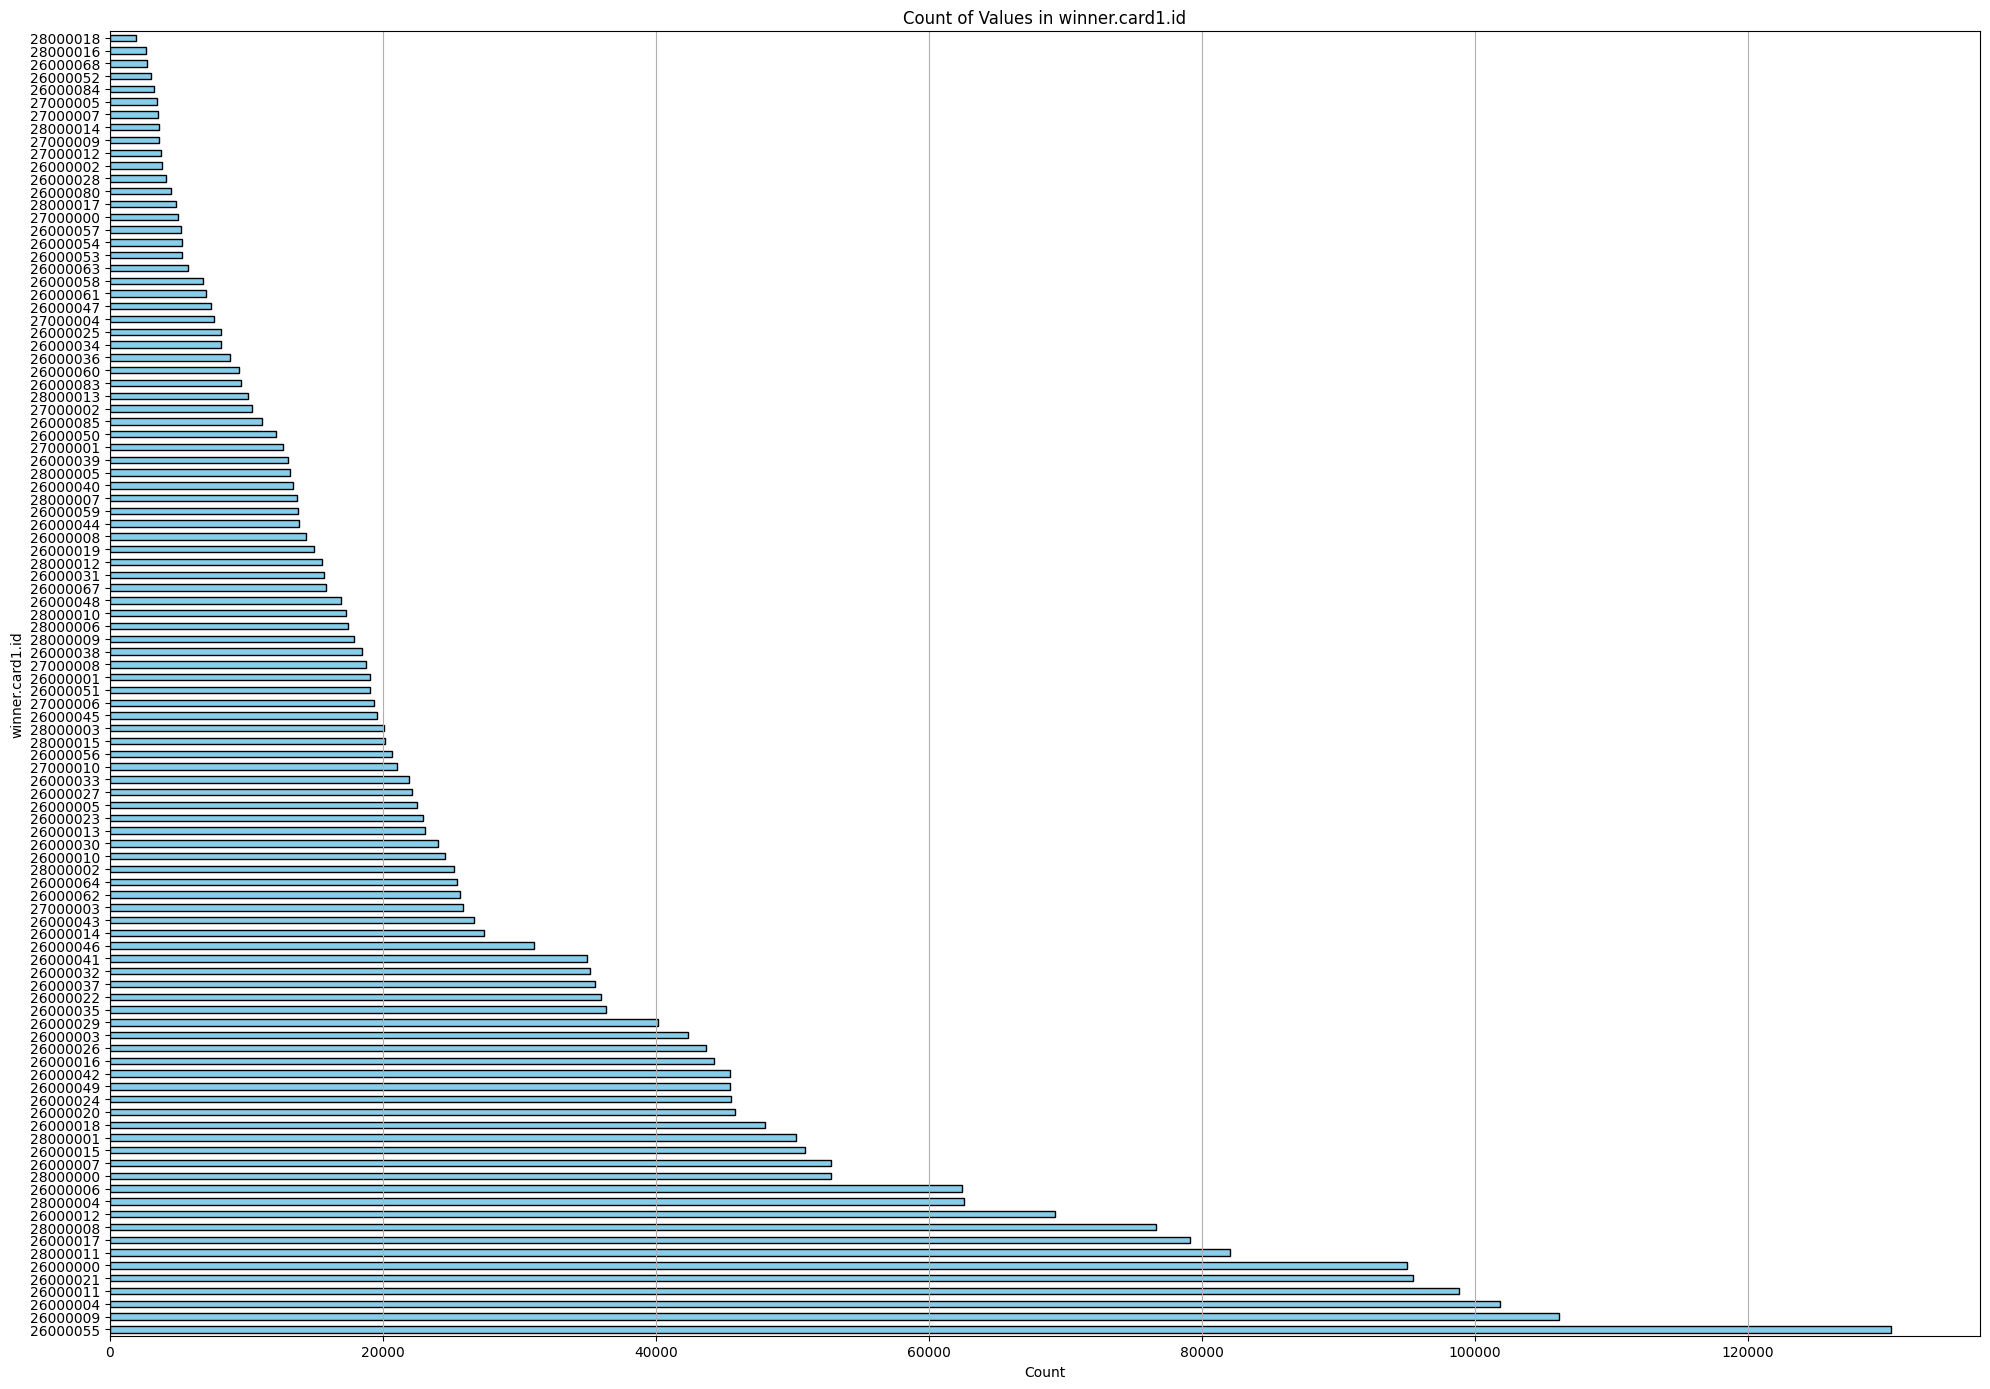

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_column_counts(file_path, column_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Extract data from the specified column
    column_data = df[column_name]

    # Count the occurrences of each unique value in the column
    value_counts = column_data.value_counts()

    # Plot the data
    plt.figure(figsize=(20, 14))
    ax = value_counts.plot(kind='barh', color='skyblue', edgecolor='black')  # Use horizontal bar chart
    
    # Customize the plot
    plt.title(f'Count of Values in {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.grid(axis='x')  # Add gridlines for better readability
    
    # Spread out the y-axis ticks
    plt.yticks(range(len(value_counts)), value_counts.index)  # Spread out y-axis ticks
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage with a raw string
file_path = r'C:\Users\Cdog1\OneDrive\Documents\MEM 680T\Final Visuals\Data_vis\src\data_vis\datapath\500069182.csv'
column_name = 'winner.card1.id'  # Replace with the name of the column you want to analyze

plot_column_counts(file_path, column_name)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_column_counts(file_path, column_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Extract data from the specified column
    column_data = df[column_name]

    # Count the occurrences of each unique value in the column
    value_counts = column_data.value_counts()

    # Plot the data
    plt.figure(figsize=(20, 14))
    ax = value_counts.plot(kind='barh', color='skyblue', edgecolor='black')  # Use horizontal bar chart
    
    # Customize the plot
    plt.title(f'Count of Values in {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.grid(axis='x')  # Add gridlines for better readability
    
    # Spread out the y-axis ticks
    plt.yticks(range(len(value_counts)), value_counts.index)  # Spread out y-axis ticks
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage with a raw string
file_path = r'C:\Users\Cdog1\OneDrive\Documents\MEM 680T\Final Visuals\Data_vis\src\data_vis\datapath\500069182.csv'
column_name = 'winner.card2.id'  # Replace with the name of the column you want to analyze

plot_column_counts(file_path, column_name)

In [2]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is loaded into 'df'
df = pd.read_csv(r'C:\Users\Cdog1\OneDrive\Documents\MEM 680T\Final Visuals\Data_vis\src\data_vis\datapath\500069182.csv')

# List of card columns
card_columns = [
    'winner.card1.id',
    'winner.card2.id',
    'winner.card3.id',
    'winner.card4.id',
    'winner.card5.id',
    'winner.card6.id',
    'winner.card7.id',
    'winner.card8.id'
]

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Card Counts"),
    
    # Dropdown menu to select card column
    dcc.Dropdown(
        id='card-dropdown',
        options=[{'label': col, 'value': col} for col in card_columns],
        value=card_columns[0],  # Default value
        multi=False
    ),
    
    # Bar graph to display counts
    dcc.Graph(id='card-count-bar')
])

# Define callback to update the bar graph based on the selected card column
@app.callback(
    dash.dependencies.Output('card-count-bar', 'figure'),
    [dash.dependencies.Input('card-dropdown', 'value')]
)
def update_card_count(selected_column):
    try:
        # Convert the column values to strings
        df[selected_column] = df[selected_column].astype(str)

        # Count occurrences of each unique value in the selected column
        card_counts = df[selected_column].value_counts()

        # Create bar chart without x-axis labels
        fig = px.bar(x=card_counts.index, y=card_counts.values, labels={'y': 'Count'},
                     title=f'Count of Values in {selected_column}', template='plotly_dark')
        
        # Set category order to ensure distinct labels for each bar
        fig.update_layout(xaxis=dict(categoryorder='total descending'))

        # Set x-axis title
        fig.update_xaxes(title_text='Card ID')
        
        fig.update_xaxes(showticklabels=False)

        return fig
    except Exception as e:
        print(f"Error: {str(e)}")
        return px.bar(title="Error", template='plotly_dark')
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
